# Locating Transition States: Constrained Optimisations

Unlike a geometry optimisation, a transition state search requires more
than just *some* guess. Finding the transition state from a reactant or
a product structure will be computationally unfeasible, as those
structures are given by local minima on the PES. Hence, all possible
paths originating from these minima will go uphill (recall the
mathematical definition of a minimum with respect to its derivatives),
and it cannot be clear in advance which paths will actually connect
reactants and products, or which path(s) will proceed *via* the lowest
lying transition state. Instead, one needs a guess that is reasonably
close to the real transition state, such that the *curvature* of the
potential energy surface close to the TS is known, making it possible to
proceed uphill along the reaction coordinate until the transition state
is reached. The general procedure for a transition state search includes
the construction of a guess geometry that should be reasonably close to
the expected TS, followed by a *constrained optimisation* (*cf.* figure
3).

```{figure} ../../images/miniumenergypath.png
---
name: TSsearch
---
Finding a transition state from an initial guess by performing a
constrained optimisation followed by a TS
search.
```

In a constrained optimisation, all degrees of freedom which are not
deemed relevant for the reaction are relaxed, whereas the relevant
degree(s) of freedom is (are) kept fixed. After the optimisation, the
curvature of the PES is evaluated at the chosen geometry (either
analytically or numerically, *cf.* the following section). If the
constrained degree(s) of freedom was (were) suitably chosen, the paths
associated to the unconstrained N-1 degrees of freedom will go uphill in
both directions, indicating that the corresponding structural parameters
were properly relaxed. There should be one degree of freedom remaining
that is associated to a path that goes downhill on one side and uphill
on the other side: This will be the path that leads uphill to the
transition state. As the associated degree of freedom is then known, the
geometry can then be optimised to a transition state by selectively
'walking uphill' along this specific path.

### Constructing a Guess

You can find below the Z-matrix for the chloropropanoate (2-Chloro-1-propanol) already set, obtained using the Open Source Software [Avogadro](https://avogadro.cc/). We want to set the Z-matrix for the transition state editing this matrix. Correct the parameters adapting the conformation to be reasonably close to the transition state: for the TS, one expects that the C-Cl bond will already be elongated, whereas the oxygen atom will start to form the epoxide ring. Change the bond angle of the oxygen atom to something smaller than the original value, such as 80◦, and modify the bond length for the C-Cl bond to an elongated conformation, such as 2.40 Å. Moreover, you need to delete the hydrogen bond to the oxygen atom, and edit the Z-matrix accordingly. 

In [1]:
import psi4
import py3Dmol
import numpy as np
import matplotlib.pyplot as plt

psi4.set_num_threads(2)
psi4.set_memory('2 GB')

import sys
sys.path.append("..")
from helpers import *

In [2]:
#Z-matrix for the chloropropanoate
chloropropanoate = psi4.geometry("""
0 1
 symmetry c1
 c
 c    1 cc2
 cl   1 clc3        2 clcc3
 h    1 hc4         2 hcc4          3 dih4
 c    1 cc5         2 ccc5          3 dih5
 o    2 oc6         1 occ6          3 dih6
 h    2 hc7         1 hcc7          6 dih7
 h    2 hc8         1 hcc8          6 dih8
 h    5 hc9         1 hcc9          2 dih9
 h    5 hc10        1 hcc10         9 dih10
 h    5 hc11        1 hcc11         9 dih11
 h    6 ho          2 hoc2          1 dih12
 
cc2     =    1.500000
clc3    =    1.790000 
clcc3   =    109.471
hc4     =    1.089000
hcc4    =    109.471
dih4    =    100.000
cc5     =    1.500000
ccc5    =    109.471
dih5    =   -100.000
oc6     =    1.430000
occ6    =    110.600  
dih6    =    180.000
hc7     =    1.070000
hcc7    =    109.471
dih7    =    120.000
hc8     =    1.070000
hcc8    =    109.471
dih8    =    240.000
hc9     =    1.070000
hcc9    =    109.471
dih9    =    180.000
hc10    =    1.070000
hcc10   =    109.471
dih10   =    120.000
hc11    =    1.070000
hcc11   =    109.471
dih11   =    240.000
ho      =    0.97       
hoc2    =    109.471    
dih12   =    180.0      
""")

#Edit the Z-matrix to obtain the TS guess accordin to the requests above
ts_guess = psi4.geometry("""
0 1
 symmetry c1
 c
 c    1 cc2
 cl   1 clc3        2 clcc3
 h    1 hc4         2 hcc4          3 dih4
 c    1 cc5         2 ccc5          3 dih5
 o    2 oc6         1 occ6          3 dih6
 h    2 hc7         1 hcc7          6 dih7
 h    2 hc8         1 hcc8          6 dih8
 h    5 hc9         1 hcc9          2 dih9
 h    5 hc10        1 hcc10         9 dih10
 h    5 hc11        1 hcc11         9 dih11
 h    6 ho          2 hoc2          1 dih12
 
cc2     =    1.500000
clc3    =    1.790000 
clcc3   =    109.471
hc4     =    1.089000
hcc4    =    109.471
dih4    =    100.000
cc5     =    1.500000
ccc5    =    109.471
dih5    =   -100.000
oc6     =    1.430000
occ6    =    110.600  
dih6    =    180.000
hc7     =    1.070000
hcc7    =    109.471
dih7    =    120.000
hc8     =    1.070000
hcc8    =    109.471
dih8    =    240.000
hc9     =    1.070000
hcc9    =    109.471
dih9    =    180.000
hc10    =    1.070000
hcc10   =    109.471
dih10   =    120.000
hc11    =    1.070000
hcc11   =    109.471
dih11   =    240.000
ho      =    0.97       
hoc2    =    109.471    
dih12   =    180.0 
""")




In [3]:
drawXYZSideBySide_labeled(chloropropanoate, ts_guess)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

```{admonition} Exercise 3
:class: exercise 
Include a screenshot of the transition state that you obtained and the corresponding Z-matrix for the transition state guess
```


### Constrained optimization

We will first optimize our transition state guess keeping the C-Cl distance fixed. 

In [4]:
ts_guess_opt = ts_guess.clone()
psi4.core.set_output_file(f'poxide.log', False)
psi4.set_options({"frozen_distance":"1 3"})
psi4.optimize('b3pw91/6-31+G*', molecule=ts_guess_opt)

Optimizer: Optimization complete!


-653.2420085847897

In [5]:
drawXYZSideBySide_labeled(ts_guess, ts_guess_opt)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Finding the Transition State 

Now that we have our  transition state guess optimized, we want to find out whether this guess is close to the transition state (meaning it has one imaginary frequency) and then optimize to the actual transition state. 

If we set `full_hess_every` to `0`, a frequency calculation will be performed at the begining (you could also do it seperately using `psi4.frequency([..])`. By setting `opt_type` to `ts` the optimization will try to find the 1st order saddlepoint that is the transition state. 

We will write the normal modes to a file for visualization. 

In [6]:
ts = ts_guess_opt.clone()
psi4.core.clean_options()

psi4.core.set_output_file(f'ts.log', False)
psi4.set_options({
    "opt_type":"ts",
    "geom_maxiter":500, 
    "normal_modes_write": True,
    "full_hess_every":0 #0 compute the initial Hessian only
    })

E = psi4.optimize('b3pw91/6-31+G*', molecule=ts)
ts.save_string_xyz_file()

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
Optimizer: Optimization complete!


'11\n\n C    0.161357053629   -0.511256148914   -0.065664084757\n C    0.161357053629   -0.511256148914    1.410182742708\nCL    0.161357053629    1.675082246570   -0.830276612112\n H    1.132467894899   -0.697551737274   -0.509038133351\n C   -1.040810400675   -1.016788088306   -0.814524778141\n O    0.357820745280   -1.868677427818    1.406009598037\n H    0.974204396689    0.103595337534    1.848386886461\n H   -0.802592739043   -0.159400885501    1.838653307947\n H   -0.947697450572   -0.799236008474   -1.882558623854\n H   -1.132489426792   -2.098230744587   -0.668157830485\n H   -1.951179355428   -0.531215137812   -0.443830646071\n'

We can also compare the TS with the guess to see how far we are. 

In [7]:
drawXYZSideBySide_labeled(ts_guess_opt, ts)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

```{admonition} Exercise 4
:class: exercise
Take a screenshot of the optimised transition state structure. How did the structure change with respect to the constrained-optimised guess?
```


```{admonition} Solution
:class: tip

Increased Cl-C distance (fixed during guess optimization) and C-C-O angle increased, resulting in a structure more symilar to the reagent than to the product. 
```

We can now have a look at the normal model that we obtained, for that we need to first check how the file is named. Then you can visualize one normal mode at time. 

In [8]:
# check how the file is named
!ls -lrth ts.*.molden_normal_modes 

-rw-r--r-- 1 anlevy software 21K Aug 12 17:26 ts.default.14947.molden_normal_modes


In [9]:
# be sure to use the right file in the show_normal_modes
NormalModeFile = !ls ts.*.molden_normal_modes 
print('File name: '+NormalModeFile[0])

show_normal_modes(filename=NormalModeFile[0])

File name: ts.default.14947.molden_normal_modes


interactive(children=(Dropdown(description='Normal mode:', options=((-381.2365479913, 0), (85.7171968568, 1), …

```{admonition} Exercise 4
:class: exercise
Report the value of the negative frequency that you obtain.  What motion is this mode related to?
What motions are associated with low and high vibrational frequencies? Choose two positive vibrational modes and desribe their particular associated motion.
```

```{admonition} Exercise 5
:class: exercise
Is the transition state you predicted an early or a late transition state? What about the guess?
```


```{admonition} Exercise 6
:class: exercise
Having found a transition state, how would you now obtain the barrier height for your reaction? Are there ways of verifying whether you have found a meaningful
    transition state? **Bonus:** How would you define 'meaningful' in
    this context?
```

```{admonition} Solution
:class: tip
From the TS it is necessary to find a minimum energy reaction path on the PES joining the reactants with the TS and the TS with the products.

TS corresponds to a saddle point of the PES, this can be verified through the  eigenvalues of the Hessian matrix. The TS found should be a maximum of the PES over the reaction coordinate. 

**Bonus:** A TS state can be defined meaningful if it is not too far from reactant and products and it is energetically feasible. 

```

Lets check again that our TS is a good one by performing a frequency calculation. 
We will save the wave function as well because we want to use the hessian to speed up our IRC search. 


In [10]:
psi4.core.clean_options()
E, wfn = psi4.frequency('b3pw91/6-31+G*', molecule=ts, return_wfn=True)

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55


# Recording a Potential Energy Profile: The Intrinsic Reaction Coordinate (IRC)


A transition state search merely guarantees that one reaches a
first-order saddle point on the PES; there is, however, no guarantee
that it is really linked to the reactant and product. (For instance,
there may be further transition states lying in between.) Although the
visualisation of the imaginary vibrational mode may give some hint as to
whether one has found a reasonable saddle point, this information is not
sufficient to guarantee a connection to the reactant and product well.
Following the negative Hessian eigenvalues from the transition state to
the next local minimum, on the other hand, will immediately reveal
whether such a connection exists. This Hessian-following in
mass-weighted coordinates is referred to as a search along the
*Intrinsic Reaction Coordinate* (IRC). This search will create a
potential energy profile for the reaction, as well as a trajectory that
visualises the lowest energy path from reactant to TS to product. 

You will verify whether the transition state
you computed is the proper state that connects your
starting material to the product, and you will build the reaction
profile and visualize it.

As Psi4 updates the molecule geometry when optimizing we make two copies for the product and reactant and then we use `irc` to follow the intrinsic reaction coordinate. 

In [11]:
backward = ts.clone()
forward = ts.clone()

In [12]:
psi4.core.clean_options()
E_b, wfn_b = psi4.optimize('b3pw91/6-31+G*', molecule=backward, return_wfn=True)

Optimizer: Optimization complete!


## Backward

First, let's optimize towards the reactant

In [13]:
psi4.core.set_output_file(f'irc_backward.log', False)
psi4.set_options({
     "geom_maxiter":500,
     "full_hess_every":0, #-1
     "opt_type":"irc",
     "irc_step_size":0.25,
     "ensure_bt_convergence":True,
#     "cart_hess_read":True,
     "irc_direction":"backward",
     })

E, history_backward = psi4.optimize('b3pw91/6-31+G*',molecule=backward, return_history=True)#, ref_gradient=wfn.gradient())

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
Optimizer: Optimization complete!


The `return_history=True` option indicates to additionally return dictionary of lists of geometries, energies, and gradients at each step in the optimization. We can use this history to follow the optimization along the IRC steps.
Some operations on the arrays are needed in order to properly visualize the PES.

In [14]:
coordinates_backward = history_backward['coordinates']
energies_backward = history_backward['energy']

backward_e = [energy * psi4.constants.hartree2kcalmol for energy in energies_backward]
backward_e.reverse()
backward_e = np.array(backward_e)-np.max(backward_e)

## Forward

Then, let's alos optimize towards the products

In [15]:
psi4.core.set_output_file(f'irc_forward.log', False)
psi4.set_options({
     "geom_maxiter":500,
     "full_hess_every":0, #-1
     "opt_type":"irc",
     "irc_step_size":0.25,
     "ensure_bt_convergence":True,
#     "cart_hess_read":True,
     "irc_direction":"forward",
     })


E, history_forward = psi4.optimize('b3pw91/6-31+G*',molecule=forward, return_history=True)#, ref_gradient=wfn.gradient())

 55 displacements needed.
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
Optimizer: Optimization complete!


In [16]:
coordinates_forward = history_forward['coordinates']
energies_forward = history_forward['energy']

forward_e = [energy * psi4.constants.hartree2kcalmol for energy in energies_forward ]
forward_e = np.array(forward_e)-np.max(forward_e)

In [18]:
energies = np.concatenate([backward_e[:-2],forward_e], axis=0)

## IRC
Now we have all the data to obtain the  potential energy profile for the reaction, as well as the trajectory that visualises the lowest energy path from reactant to TS to product.

We can fist have a look at the *backward* and *forward* conformations, which correspond to the starting and ending point of the IRC that we performed

In [17]:
drawXYZSideBySide_labeled(backward, forward)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Now let's have a look to the potential energy profile along the IRC steps. 

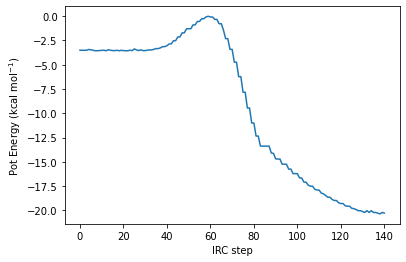

In [19]:
fig, ax =  plt.subplots(1)

ax.plot(energies)
ax.set_xlabel('IRC step')
ax.set_ylabel('Pot Energy (kcal mol$^{-1}$)')

plt.show()

```{admonition} Exercise 7
:class: exercise
Take a screenshot of the graph of the potential energy profile you
    recorded. 
Why is the barrier for the epoxide formation so low? Will this be
    the overall barrier for the reaction as depicted in the previous section?
```


We can have a closer look at the process, focusing on different parameters along the scan. First of all we can observe visually how the conformation changes during the process, then we will try to have a more quantitative understanding of the process,  focusing on meaningful parameters.  

In [21]:
coordinates_backward.reverse()
coordinates = coordinates_backward + coordinates_forward
traj = mol2traj(ts, coordinates)
drawXYZGeomSlider(traj)

interactive(children=(IntSlider(value=0, description='conf', max=142), Output()), _dom_classes=('widget-intera…

```{admonition} Exercise 8
:class: exercise
Is the stereochemistry at the carbon at which the reaction takes
    place retained?
```

Let's have a look at different bond distances involving different atoms in the molecule. You can have a look at the labeled represetnations of the molecule above to understand between which atoms the distances are calculated.

In [22]:
traj_array = coord2traj_array(coordinates)

bond_length_C0_Cl2 = []
bond_length_C0_O5 = []
bond_length_C1_O5 = []
bond_length_C0_C1 = []

for coord in traj_array:
    bond_length_C0_Cl2.append(calculate_bond(coord[0], coord[2])) 
    bond_length_C0_O5.append(calculate_bond(coord[0], coord[5])) 
    bond_length_C1_O5.append(calculate_bond(coord[1], coord[5])) 
    bond_length_C0_C1.append(calculate_bond(coord[0], coord[1])) 

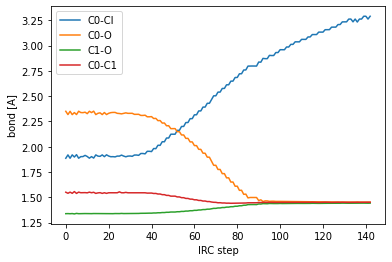

In [23]:
fig, ax = plt.subplots(1)
ax.plot(bond_length_C0_Cl2)
ax.plot(bond_length_C0_O5)
ax.plot(bond_length_C1_O5)
ax.plot(bond_length_C0_C1)
plt.legend(["C0-Cl", "C0-O", "C1-O", "C0-C1"])

ax.set_xlabel('IRC step')
ax.set_ylabel('bond [A]')
plt.show()

```{admonition} Exercise  9
:class: exercise
How do the C-Cl and the two relevant C-O bond lengths change during
    the trajectory? Does the C-C bond in the ring contract as the
    epoxide is formed? Show a graph depicting the evolution of these
    parameters as the reaction progresses. 
```


```{admonition} Exercise 10
:class: exercise
What is happening to the methyl group as the reaction proceeds? Find
    a suitable parameter (angle, dihedral) to describe and characterise
    possible changes you observe, change the code below. Explain in your report what atoms you considered and take and include the evolutions of the chosen parameters during the IRC procedure. 
```

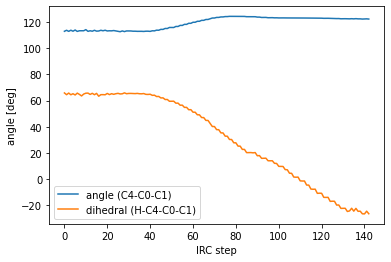

In [24]:
#Modify the code below, chosing proper atoms to monitor the changes of the methyl group 
methyl_angle = []
methyl_dihedral = []

for coord in traj_array:
    methyl_angle.append(calculate_angle(coord[#], coord[#], coord[#])) 
    methyl_dihedral.append(calculate_dihedral(coord[#], coord[#], coord[#], coord[#])) 
    
fig, ax = plt.subplots(1)
ax.plot(methyl_angle)
ax.plot(methyl_dihedral)
plt.legend(["angle (#-#-#)", "dihedral (#-#-#-#)"])

ax.set_xlabel('IRC step')
ax.set_ylabel('angle [deg]')
plt.show()